<a href="https://colab.research.google.com/github/mathavan5275/Virat_76_Centuries_Visualization/blob/main/Virat_76Centuries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/drive/MyDrive/Virat_Centuries.csv')
df.head()

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result
0,1,107,Sri Lanka,4,2,"Eden Gardens, Kolkata",Home,24-Dec-09,Won
1,2,102*,Bangladesh,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,11-Jan-10,Won
2,3,118,Australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,20-Oct-10,Won
3,4,105,New Zealand,3,1,"Nehru Stadium, Guwahati",Home,28-Nov-10,Won
4,5,100*,Bangladesh,4,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,19-Feb-11,Won


In [ ]:
df.tail()

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result
72,73,113,Sri Lanka,3,1,"ACA Stadium, Guwahati",Home,10-Jan-23,Won
73,74,166*,Sri Lanka,3,1,"Greenfield International Stadium, Thiruvananth...",Home,15-Jan-23,Won
74,75,186,Australia,4,2,"Narendra Modi Stadium, Ahmedabad",Home,09-Mar-23,Drawn
75,76,121,West Indies,4,1,"Queen's Park Oval, Port of Spain",Away,20-Jul-23,Drawn
76,77,122*,Pakistan,3,1,"R. Premadasa Stadium, Colombo",Neutral,11-Sep-23,Won


Info about the columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No.       77 non-null     int64 
 1   Runs      77 non-null     object
 2   Against   77 non-null     object
 3   Position  77 non-null     int64 
 4   Innings   77 non-null     int64 
 5   Venue     77 non-null     object
 6   Ground    77 non-null     object
 7   Date      77 non-null     object
 8   Result    77 non-null     object
dtypes: int64(3), object(6)
memory usage: 5.5+ KB


Extracting date, month and year from Date column

In [ ]:
df['Date']= pd.to_datetime(df['Date'])
df['Day']= df['Date'].dt.day
df['Month']= df['Date'].dt.month
df['Year']= df['Date'].dt.year
df.head()


,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result,Day,Month,Year
0,1,107,Sri Lanka,4,2,"Eden Gardens, Kolkata",Home,2009-12-24,Won,24,12,2009
1,2,102*,Bangladesh,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,2010-01-11,Won,11,1,2010
2,3,118,Australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,2010-10-20,Won,20,10,2010
3,4,105,New Zealand,3,1,"Nehru Stadium, Guwahati",Home,2010-11-28,Won,28,11,2010
4,5,100*,Bangladesh,4,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,2011-02-19,Won,19,2,2011


Adding a column about Out or not out info (* following the score indicates not out and out otherwise)

In [ ]:
df['Not_out'] = df['Runs'].str.contains('\*').astype(bool)
df['Not_out'] = df['Not_out'].replace(True,'Not Out')
df['Not_out'] = df['Not_out'].replace(False,'Out')
df.head()


,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result,Day,Month,Year,Not_out
0,1,107,Sri Lanka,4,2,"Eden Gardens, Kolkata",Home,2009-12-24,Won,24,12,2009,Out
1,2,102*,Bangladesh,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,2010-01-11,Won,11,1,2010,Not Out
2,3,118,Australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,2010-10-20,Won,20,10,2010,Out
3,4,105,New Zealand,3,1,"Nehru Stadium, Guwahati",Home,2010-11-28,Won,28,11,2010,Out
4,5,100*,Bangladesh,4,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,2011-02-19,Won,19,2,2011,Not Out


Removing * from scores as it is not needed further, also convert the scores into int

In [ ]:
df['Runs'] = df['Runs'].str.replace('*','')
df['Runs']  = df['Runs'].astype(int)
df.head()


<ipython-input-6-06ad84f391dc>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Runs'] = df['Runs'].str.replace('*','')


,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result,Day,Month,Year,Not_out
0,1,107,Sri Lanka,4,2,"Eden Gardens, Kolkata",Home,2009-12-24,Won,24,12,2009,Out
1,2,102,Bangladesh,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,2010-01-11,Won,11,1,2010,Not Out
2,3,118,Australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,2010-10-20,Won,20,10,2010,Out
3,4,105,New Zealand,3,1,"Nehru Stadium, Guwahati",Home,2010-11-28,Won,28,11,2010,Out
4,5,100,Bangladesh,4,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,2011-02-19,Won,19,2,2011,Not Out


Not_out and Out counts

In [ ]:
df['Not_out'].value_counts()

Out        55
Not Out    22
Name: Not_out, dtype: int64

Centuries against team list

In [ ]:
df['Against'].value_counts()

 Australia       16
 Sri Lanka       15
 West Indies     11
 New Zealand      8
 England          8
 South Africa     7
 Bangladesh       6
 Pakistan         2
 Zimbabwe         1
 Afghanistan      1
West Indies       1
Pakistan          1
Name: Against, dtype: int64

Runs Count

In [ ]:
df['Runs'].value_counts()

107    5
103    5
122    3
123    3
115    3
113    3
106    2
139    2
136    2
102    2
104    2
121    2
116    2
117    2
112    2
100    2
105    2
160    1
213    1
243    1
153    1
140    1
129    1
149    1
131    1
157    1
120    1
114    1
254    1
166    1
110    1
211    1
111    1
204    1
118    1
133    1
108    1
183    1
128    1
119    1
127    1
141    1
169    1
147    1
138    1
200    1
154    1
167    1
235    1
186    1
Name: Runs, dtype: int64

Centuries listed by stadium

In [ ]:
df['Venue'].value_counts()

Adelaide Oval, Adelaide                                  5
Queen's Park Oval, Port of Spain                         4
Sher-e-Bangla Cricket Stadium, Dhaka                     4
R. Premadasa Stadium, Colombo                            4
Eden Gardens, Kolkata                                    3
Maharashtra Cricket Association Stadium, Pune            3
Vidarbha Cricket Association Stadium, Nagpur             3
Galle International Stadium, Galle                       2
Melbourne Cricket Ground, Melbourne                      2
JSCA International Stadium, Ranchi                       2
SuperSport Park, Centurion                               2
ACA-VDCA Cricket Stadium, Visakhapatnam                  2
Wankhede Stadium, Mumbai                                 2
M. A. Chidambaram Stadium, Chennai                       2
ACA Stadium, Guwahati                                    2
Feroz Shah Kotla Ground, Delhi                           2
APCA-VDCA Stadium, Visakhapatnam                        

Result of the matches

In [ ]:
df['Result'].value_counts()

Won           52
Lost          13
Drawn          9
Lost (D/L)     1
Won (D/L)      1
Tied           1
Name: Result, dtype: int64

Centuries by year

In [ ]:
df['Year'].value_counts()

2017    11
2018    11
2012     8
2014     8
2016     7
2019     7
2013     6
2023     5
2011     4
2015     4
2010     3
2022     2
2009     1
Name: Year, dtype: int64

Chart for Centuries against countries

Text(0.5, 1.0, 'Centuries against Countries')

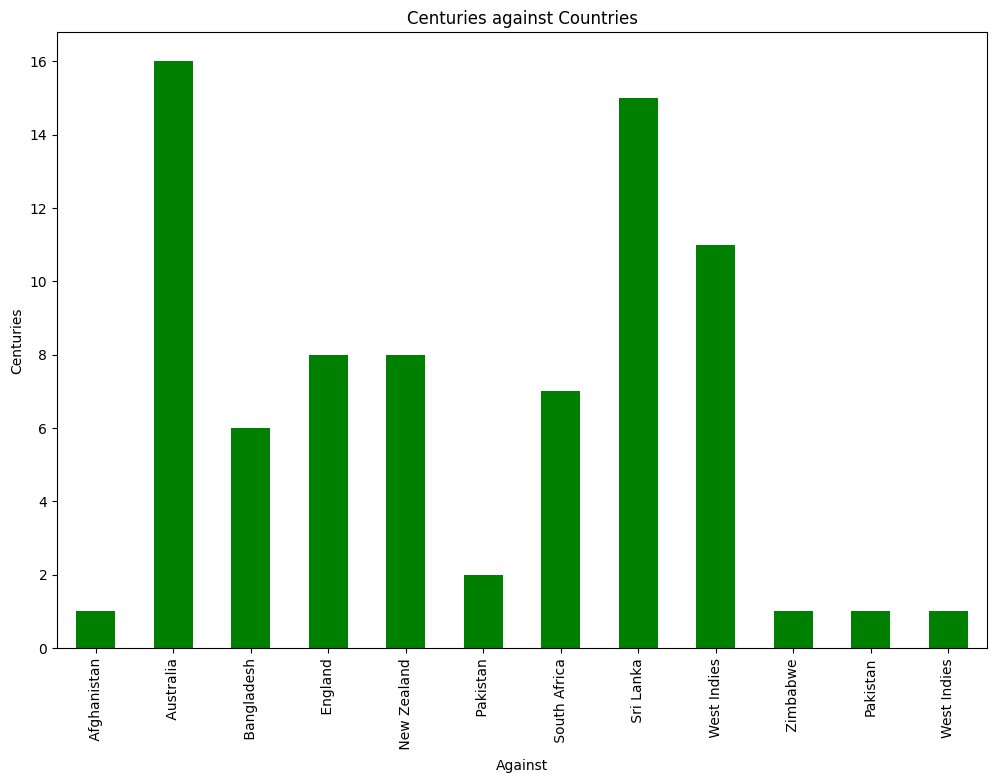

In [ ]:
a=df.groupby('Against')['Runs'].count()
a.plot(kind='pie',color='green',figsize=(12,8))

plt.xlabel('Against')
plt.ylabel('Centuries')
plt.title('Centuries against Countries')


Chart for Win rate when Virat scored Hundreds

Text(0.5, 1.0, 'Win rate when Virat scored Hundreds')

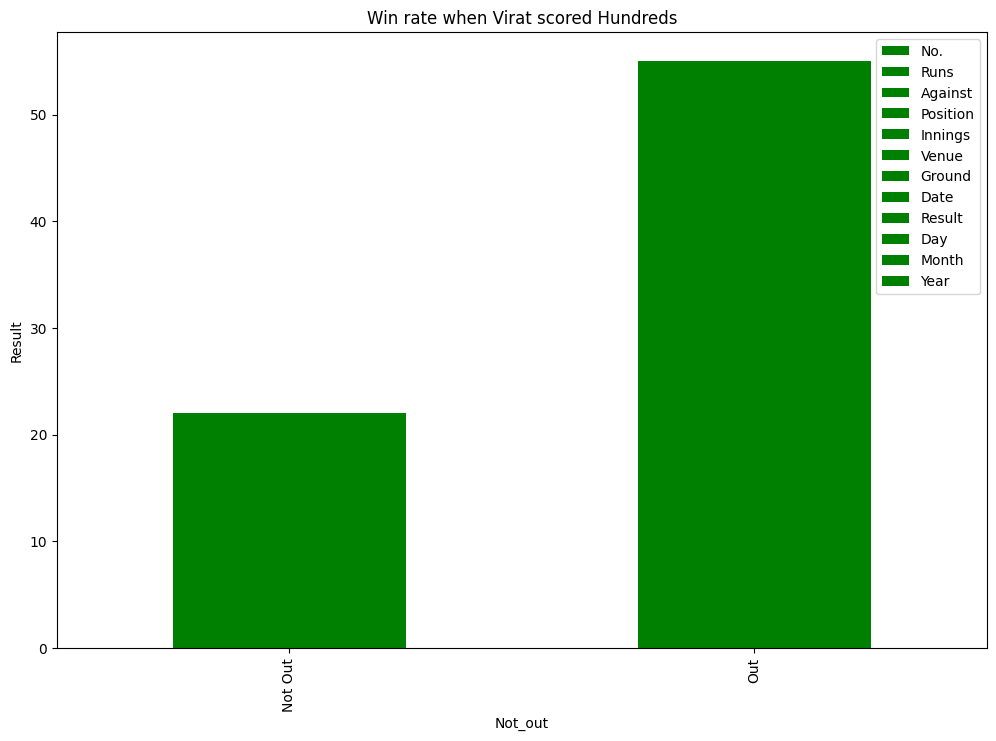

In [ ]:
a=df.groupby('Not_out').count()
a.plot(kind='bar',color='green',figsize=(12,8))

plt.xlabel('Not_out')
plt.ylabel('Result')
plt.title('Win rate when Virat scored Hundreds')

Centuries Distribution

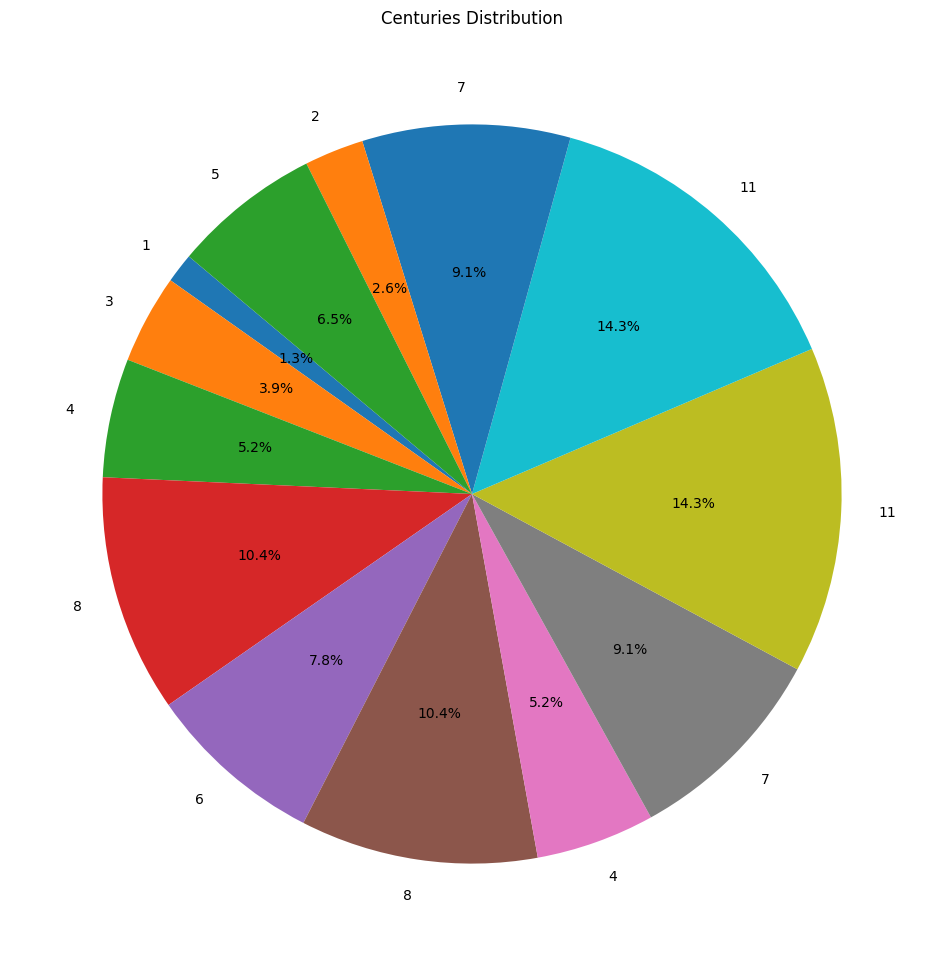

In [ ]:
from pandas.tseries.offsets import YearBegin

a=df.groupby('Year')['Runs'].count()

plt.figure(figsize=(12, 12))
plt.pie(a, labels=a, autopct='%1.1f%%', startangle=140)
plt.title('Centuries Distribution')

plt.show()


Team-wise result

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, ' Sri Lanka'),
  Text(1, 0, ' Bangladesh'),
  Text(2, 0, ' Australia'),
  Text(3, 0, ' New Zealand'),
  Text(4, 0, ' England'),
  Text(5, 0, ' West Indies'),
  Text(6, 0, ' Pakistan'),
  Text(7, 0, ' Zimbabwe'),
  Text(8, 0, ' South Africa'),
  Text(9, 0, ' Afghanistan'),
  Text(10, 0, 'West Indies'),
  Text(11, 0, 'Pakistan')])

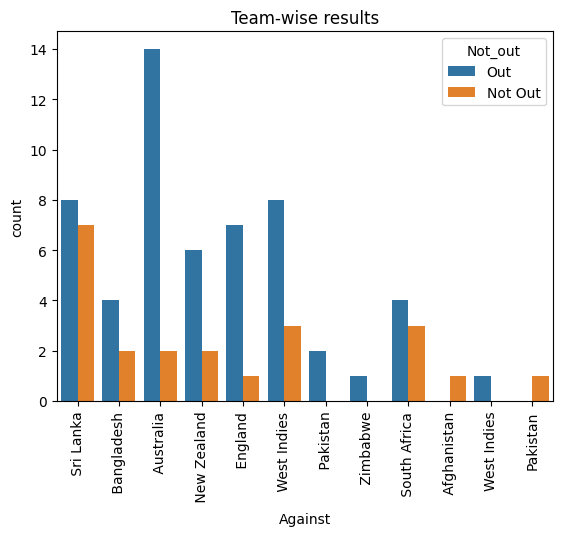

In [ ]:
graph = sns.countplot(df,x=df['Against'],hue='Not_out')
graph.set(title = 'Team-wise results')
plt.xticks(rotation = 90)

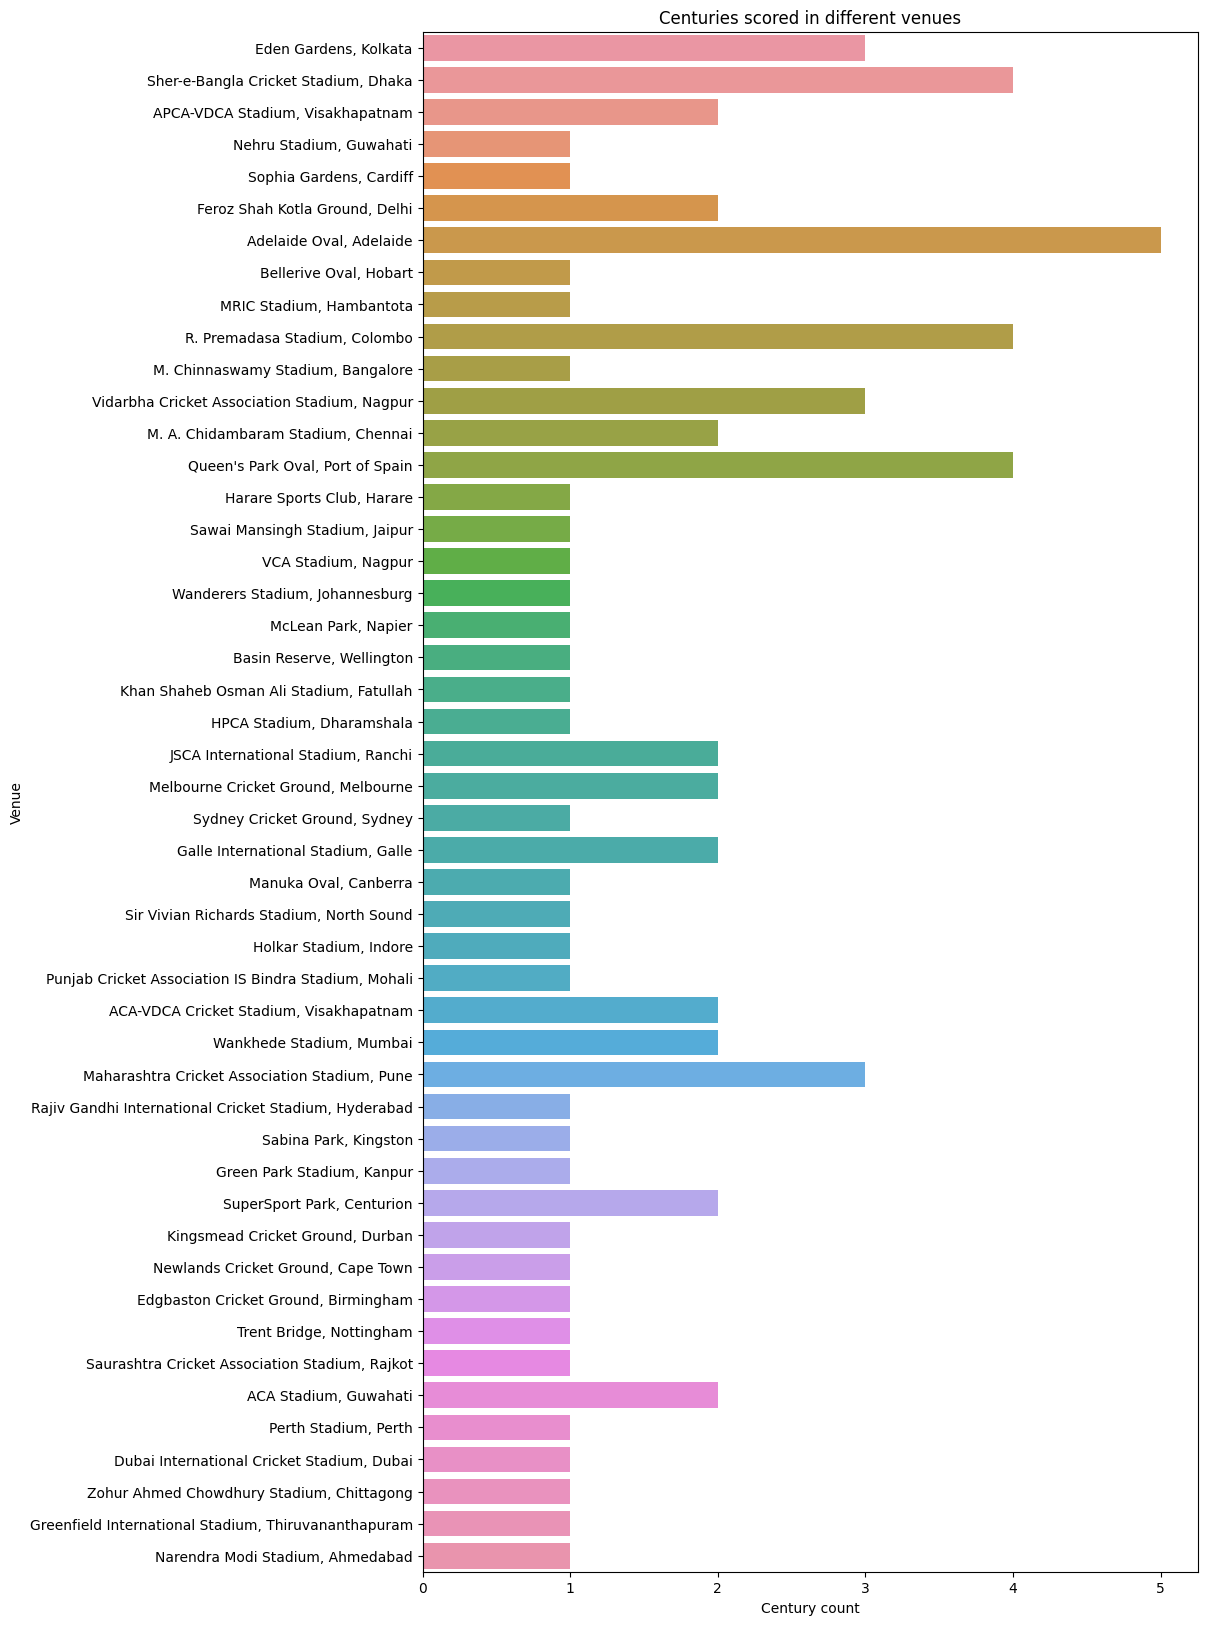

In [ ]:
plt.figure(figsize =(10, 20))
sns.countplot(y='Venue',data=df)
plt.title("Centuries scored in different venues")
plt.xlabel("Century count")
plt.ylabel("Venue")
plt.show()

Centuries distribution by Year

([<matplotlib.patches.Wedge at 0x7b9fdc4b1d50>,
 [Text(0.9910657451172095, 0.47727213291294374, '2017'),
  Text(0.24477296280441296, 1.0724207181325571, '2018'),
  Text(-0.57570485700248, 0.9373174049508279, '2012'),
  Text(-1.026670204472527, 0.39490288837680054, '2014'),
  Text(-1.0672045277915938, -0.2665980042331932, '2016'),
  Text(-0.7536558026777154, -0.8012508540339964, '2019'),
  Text(-0.2447729126007758, -1.0724207295912054, '2013'),
  Text(0.24477313851713864, -1.07242067802727, '2023'),
  Text(0.6134576306903687, -0.9130551655555974, '2011'),
  Text(0.8738258647361604, -0.668152945154103, '2015'),
  Text(1.0266702137158958, -0.3949028643458503, '2010'),
  Text(1.0853837385367349, -0.17872364174898864, '2022'),
  Text(1.0990845837440835, -0.04486733529077332, '2009')],
 [Text(0.5405813155184778, 0.2603302543161511, '14.29%'),
  Text(0.13351252516604342, 0.5849567553450311, '14.29%'),
  Text(-0.3140208310922618, 0.5112640390640879, '10.39%'),
  Text(-0.5600019297122875, 0.215

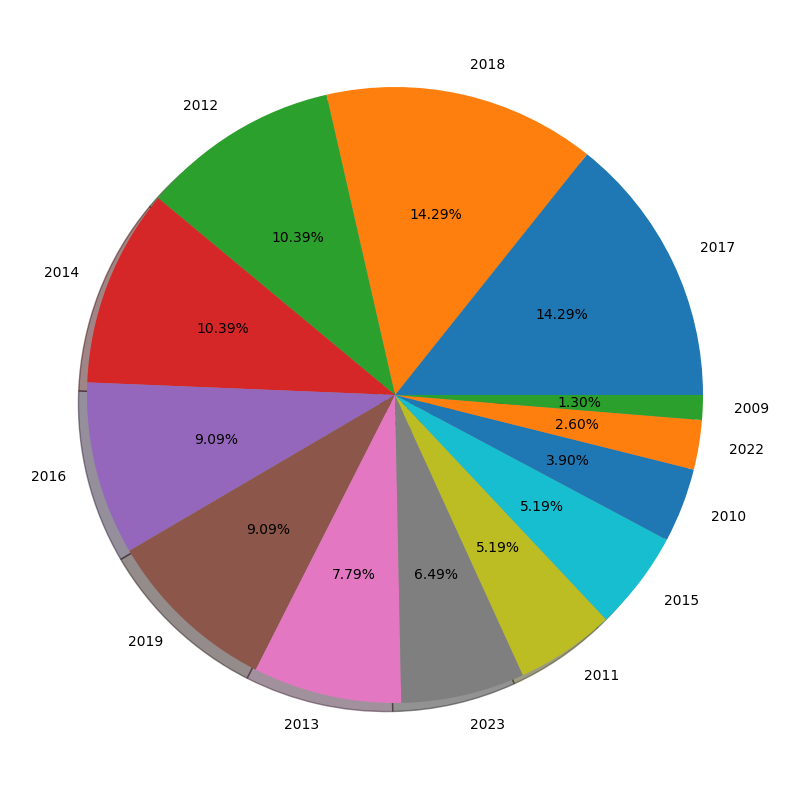

In [ ]:
plt.figure(figsize = (20,10))
plt.pie(df['Year'].value_counts(),autopct='%1.2f%%', labels=df['Year'].value_counts().index,shadow =True)

Position During centuries

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '3'),
  Text(1, 0, '4'),
  Text(2, 0, '5'),
  Text(3, 0, '6'),
  Text(4, 0, '2')])

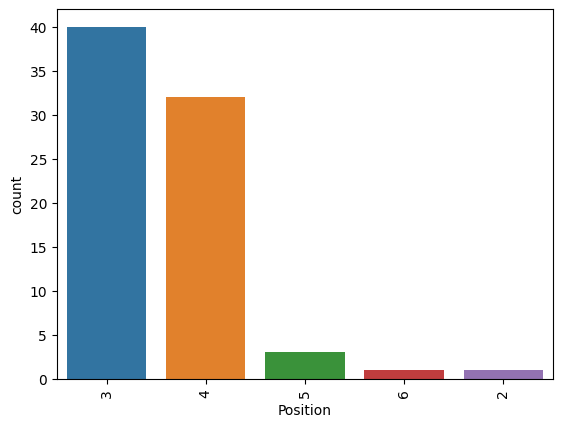

In [ ]:
sns.countplot(data=df,x="Position",order=df["Position"].value_counts().index)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, ' Sri Lanka'),
  Text(1, 0, ' Bangladesh'),
  Text(2, 0, ' Australia'),
  Text(3, 0, ' New Zealand'),
  Text(4, 0, ' England'),
  Text(5, 0, ' West Indies'),
  Text(6, 0, ' Pakistan'),
  Text(7, 0, ' Zimbabwe'),
  Text(8, 0, ' South Africa'),
  Text(9, 0, ' Afghanistan'),
  Text(10, 0, 'West Indies'),
  Text(11, 0, 'Pakistan')])

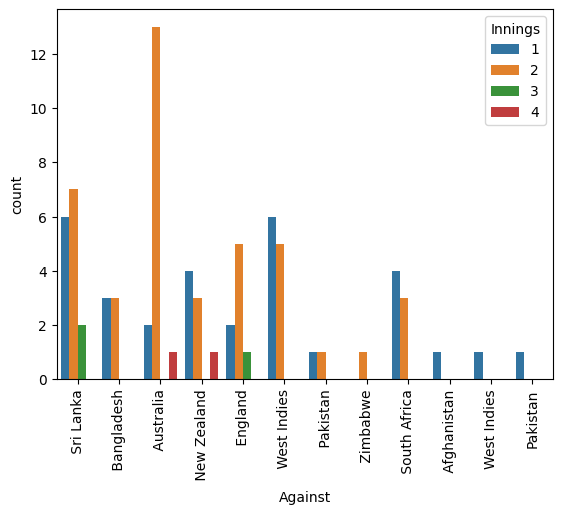

In [ ]:
sns.countplot(data=df,x="Against",hue="Innings")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, ' Sri Lanka'),
  Text(1, 0, ' Bangladesh'),
  Text(2, 0, ' Australia'),
  Text(3, 0, ' New Zealand'),
  Text(4, 0, ' England'),
  Text(5, 0, ' West Indies'),
  Text(6, 0, ' Pakistan'),
  Text(7, 0, ' Zimbabwe'),
  Text(8, 0, ' South Africa'),
  Text(9, 0, ' Afghanistan'),
  Text(10, 0, 'West Indies'),
  Text(11, 0, 'Pakistan')])

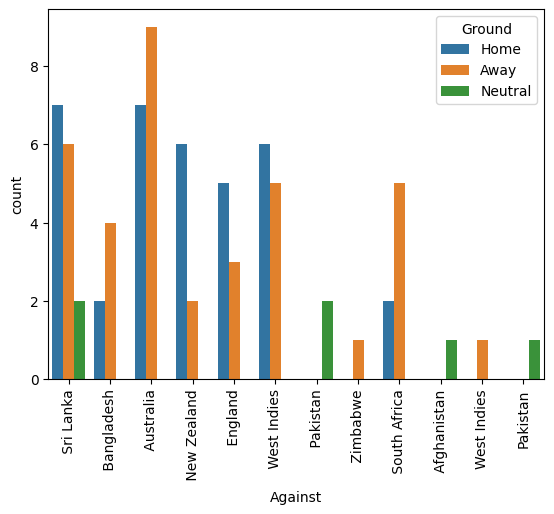

In [ ]:
sns.countplot(data=df,x="Against",hue="Ground")
plt.xticks(rotation=90)

Visualization of centuries in home and away

(array([0, 1, 2]),
 [Text(0, 0, 'Home'), Text(1, 0, 'Away'), Text(2, 0, 'Neutral')])

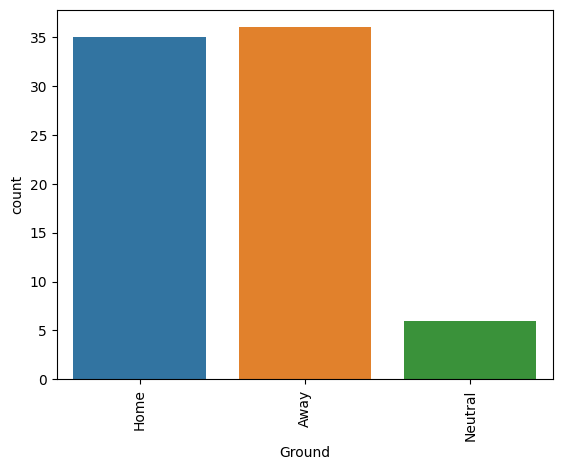

In [ ]:
sns.countplot(data=df,x="Ground")
plt.xticks(rotation=90)

Centuries in different innings

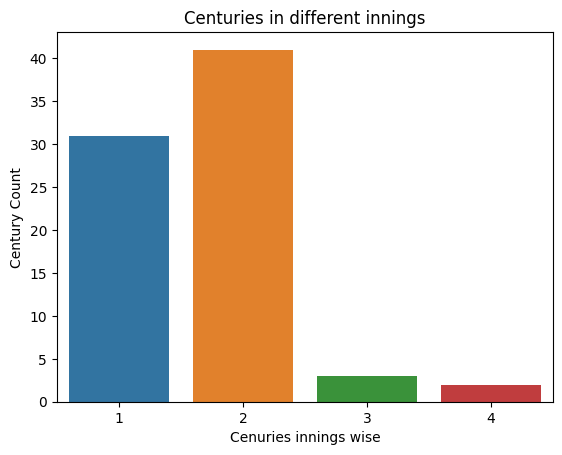

In [ ]:
sns.countplot(x='Innings', data=df)
plt.title("Centuries in different innings")
plt.xlabel("Cenuries innings wise")
plt.ylabel("Century Count")
plt.show()

Centuries against different countries

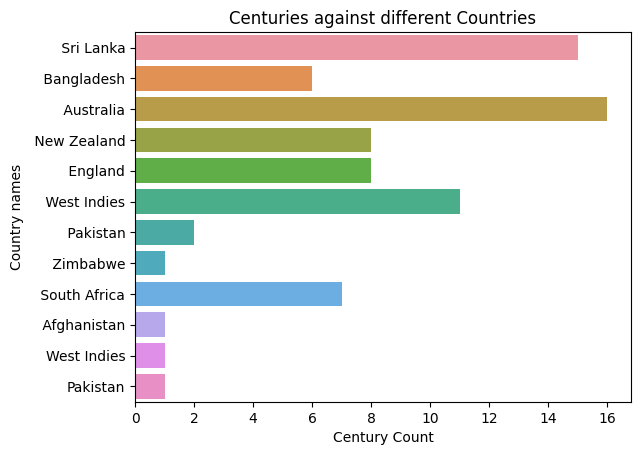

In [ ]:
sns.countplot(y='Against',data=df)
plt.title("Centuries against different Countries")
plt.ylabel("Country names")
plt.xlabel("Century Count")
plt.show()